In [310]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import gridspec
import pandas as pd

# 1. 상태지수

## 1) 정의

### (1) 데이터 행렬의 다중공선성 여부를 판단하는 방법
### (2) XtX의 상관 행렬을 구한 후, 그 고유분해를 통해 나오는 고윳값을 이용한다.
#### - X의 어떤 상관행렬이 존재한다고 하자.

In [291]:
X = np.matrix([[4,2,3],[4,2,3],[6,7,0]])
print(X)

[[4 2 3]
 [4 2 3]
 [6 7 0]]


In [292]:
#평균을 빼 중심화 해준다.

X = X - np.mean(X,axis=1)
print(X)

[[ 1.         -1.          0.        ]
 [ 1.         -1.          0.        ]
 [ 1.66666667  2.66666667 -4.33333333]]


In [293]:
#공분산 행렬을 구해준다.

X_corr = np.matmul(X,X.T)/2
print(X_corr)

[[ 1.          1.         -0.5       ]
 [ 1.          1.         -0.5       ]
 [-0.5        -0.5        14.33333333]]


#### - 이 상관행렬의 고유분해를 실시한다.

In [294]:
X_corr_eig = np.linalg.eig(X_corr)
X_corr_eig

(array([-2.22044605e-16,  1.95959185e+00,  1.43737415e+01]),
 matrix([[-7.07106781e-01,  7.05955024e-01, -4.03423318e-02],
         [ 7.07106781e-01,  7.05955024e-01, -4.03423318e-02],
         [ 1.63450702e-17,  5.70526728e-02,  9.98371170e-01]]))

#### - 이 때, 고윳값의 총합은 데이터 X의 분산과 같고

In [295]:
sum(X_corr_eig[0])

16.333333333333332

#### - 가장 큰값인 세번째 고윳값과, 첫번째 고윳값의 비율의 근은

In [296]:
(X_corr_eig[0][2]/X_corr_eig[0][0]) ** (1/2)

# 상태지수가 표현 가능한 자릿수를 넘어 nan이 표기된다.

C:\Users\never\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

### (3) 시각적인 이해 - 과연 무슨 일이 일어나고 있나?

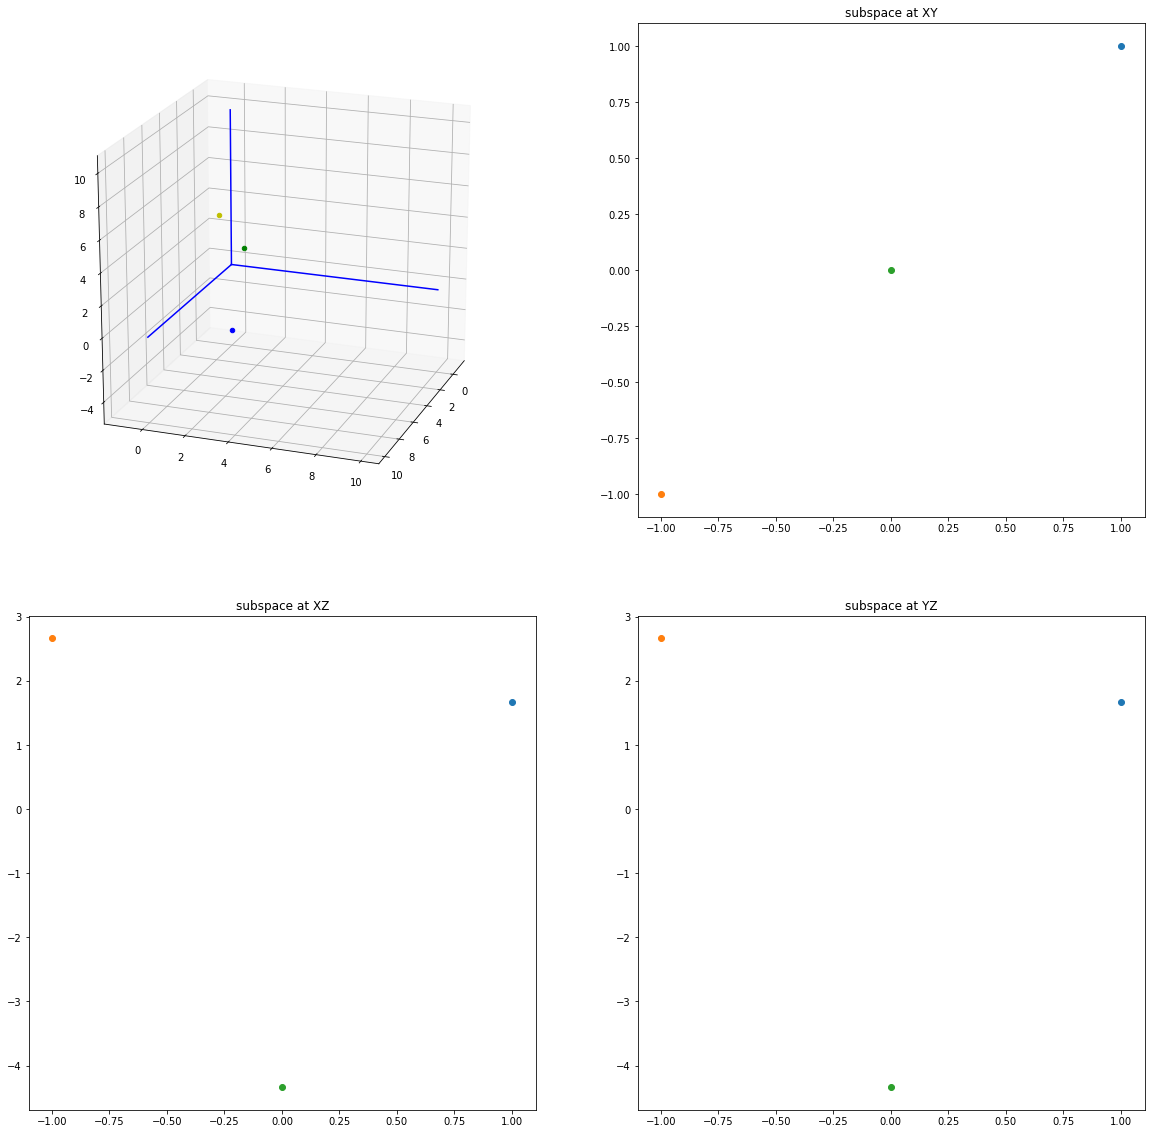

In [314]:
plt.figure(figsize = (20,20))
fig_1 = plt.subplot(2,2,1,projection="3d")
fig_2 = plt.subplot(2,2,2,title = "subspace at XY")
fig_3 = plt.subplot(2,2,3,title = "subspace at XZ")
fig_4 = plt.subplot(2,2,4,title = "subspace at YZ")



first = np.linspace(0,10,1000)
second = np.linspace(0,0,1000)
third = np.linspace(0,0,1000)

fig_1.plot3D(first,second,third,c="b")
fig_1.plot3D(second,first,third,c="b")
fig_1.plot3D(third,second,first,c="b")

fig_1.scatter3D(X[0,0],X[1,0],X[2,0],marker="o",c="g",label = "Vector X") 
fig_1.scatter3D(X[0,1],X[1,1],X[2,1],marker="o",c="y",label = "Vector X") 
fig_1.scatter3D(X[0,2],X[1,2],X[2,2],marker="o",c="b",label = "Vector X") 

fig_2.scatter(X[0,0],X[1,0])
fig_2.scatter(X[0,1],X[1,1])
fig_2.scatter(X[0,2],X[1,2])

fig_3.scatter(X[1,0],X[2,0])
fig_3.scatter(X[1,1],X[2,1])
fig_3.scatter(X[1,2],X[2,2])

fig_4.scatter(X[0,0],X[2,0])
fig_4.scatter(X[0,1],X[2,1])
fig_4.scatter(X[0,2],X[2,2])


fig_1.view_init(20,20)


plt.show()

#### - 위 그래프를 살펴보면, XY 평면에선 변수들이 완전한 선형관계를 띄고 있음을 볼 수 있다. 즉, 변수 X와 Y는 상관관계가 매우 뚜렷하다.

#### - 위에서 도출한 데이터행렬 X의 상관행렬의 고유분해를 실시하면

In [285]:
X_corr_eig[1]

matrix([[-7.07106781e-01,  7.05955024e-01, -4.03423318e-02],
        [ 7.07106781e-01,  7.05955024e-01, -4.03423318e-02],
        [ 1.63450702e-17,  5.70526728e-02,  9.98371170e-01]])

In [286]:
X_corr_eig

(array([-2.22044605e-16,  1.95959185e+00,  1.43737415e+01]),
 matrix([[-7.07106781e-01,  7.05955024e-01, -4.03423318e-02],
         [ 7.07106781e-01,  7.05955024e-01, -4.03423318e-02],
         [ 1.63450702e-17,  5.70526728e-02,  9.98371170e-01]]))

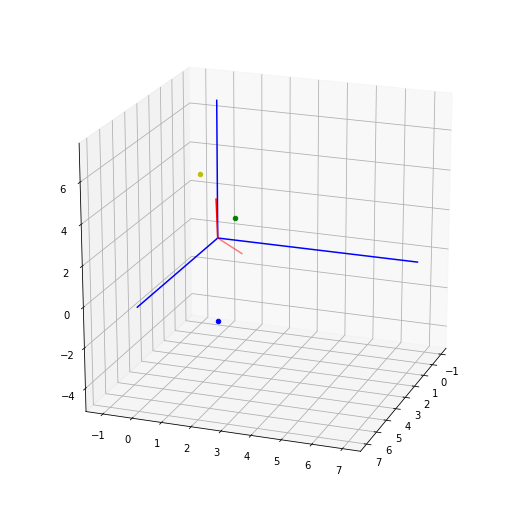

In [316]:
plt.figure(figsize = (20,20))
fig_1 = plt.subplot(2,2,1,projection="3d")

first = np.linspace(0,7,1000)
second = np.linspace(0,0,1000)
third = np.linspace(0,0,1000)

fig_1.plot3D(first,second,third,c="b")
fig_1.plot3D(second,first,third,c="b")
fig_1.plot3D(third,second,first,c="b")

fig_1.scatter3D(X[0,0],X[1,0],X[2,0],marker="o",c="g",label = "Vector X") 
fig_1.scatter3D(X[0,1],X[1,1],X[2,1],marker="o",c="y",label = "Vector X") 
fig_1.scatter3D(X[0,2],X[1,2],X[2,2],marker="o",c="b",label = "Vector X") 

x = np.linspace(0,X_corr_eig[1][0,0] * X_corr_eig[0][0],1000)
x_y = np.linspace(0,X_corr_eig[1][1,0]* X_corr_eig[0][0],1000)
x_z = np.linspace(0,X_corr_eig[1][2,0]* X_corr_eig[0][0],1000)

y_x = np.linspace(0,X_corr_eig[1][0,1]* X_corr_eig[0][1],1000)
y = np.linspace(0,X_corr_eig[1][1,1]* X_corr_eig[0][1],1000)
y_z = np.linspace(0,X_corr_eig[1][2,1]* X_corr_eig[0][1],1000)

z_x = np.linspace(0,X_corr_eig[1][0,2]* X_corr_eig[0][1],1000)
z_y = np.linspace(0,X_corr_eig[1][1,2]* X_corr_eig[0][1],1000)
z = np.linspace(0,X_corr_eig[1][2,2]* X_corr_eig[0][1],1000)

fig_1.plot3D(x,x_y,x_z,c="r")
fig_1.plot3D(y_x,y,y_z,c="r",alpha=0.5)
fig_1.plot3D(z_x,z_y,z,c="r")


fig_1.view_init(20,20)

plt.show()

#### - 이 때, 빨간색으로 나타나는 새로운 기저가 바로 고유기저가 된다.
#### 이 새 기저의 특징은
- 한개의 축이 거의 소실되어서 보이지 않는다. 즉, 고유기저행렬은 Full-Rank가 아니다.
- 고유값의 속성에서, 고윳값의 곱은 행렬의 행렬식과 같다. 즉
det(ㅅ) = det(XtX)이다.
- 이 때, 한 개의 축이 소실되었다는 의미는 적어도 하나의 고윳값은 0에 매우 가까운 작은값이란 의미고, 따라서 det(ㅅ) = ㅅ1 * ㅅ2 * ㅅ3 는 0에 가깝다.


- 즉, det(ㅅ) = det(XtX) = 0이다.

#### - det(XtX) = 0이란 의미는, 행렬 XtX는 특이행렬이란 의미이다. 즉, 역행렬이 존재하지 않는다.
#### - XtX의 역행렬이 존재하지 않는다는 의미는 다시말해 X에 다중공선성이 존재한다는 의미이다.